In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

1D Gradient Descent Localization

In [139]:
def get_gaussian_grad_mu(x, sigma, mu):
    dgdmu = 1/(sigma*(2*np.pi)**0.5)*np.exp(-1/2*((x-mu)/sigma)**2)*(x-mu)/sigma**2
    return dgdmu

def get_gaussian_grad_sigma(x, sigma, mu):
    dgdsigma = (np.exp(-1/2*(x-mu)**2/sigma**2)*(x-mu)**2)/(np.sqrt(2*np.pi)*sigma**4)-(np.exp(-1/2*(x-mu)**2/sigma**2))/(np.sqrt(2*np.pi)*sigma**2)
    return dgdsigma

def gaussian(x, sigma, mu):
    gaussian = 1/(sigma*(2*np.pi)**0.5)*np.exp(-1/2*((x-mu)/sigma)**2)
    return gaussian

Approximated sigma: 1.0000000000000027
Approximated mu: 0.999999999999998


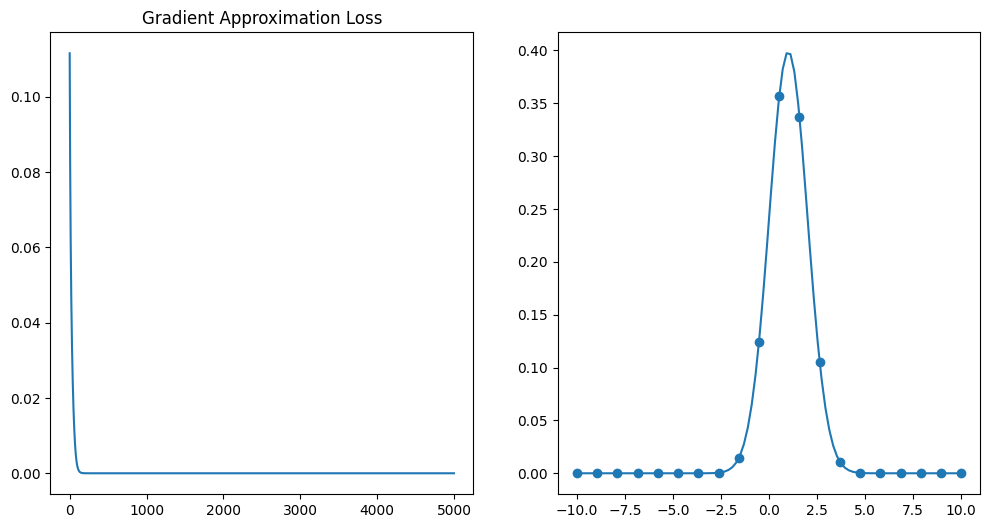

In [176]:
## create data
x = np.linspace(-10,10,20)
y = gaussian(x, 1,1)
# y = gaussian(x, 1, 5) + np.random.randn(len(x))/100
# plt.scatter(x,y)

sigma = 1
mu = 0
lr = 0.1

def descend(x, y, sigma, mu, lr):
    dldmu = 0.0
    dldsigma = 0.0
    N = x.shape[0]
    #loss = (y-yhat)^2
    for xi, yi in zip(x,y):
        dldmu += 2*(yi-gaussian(xi, sigma, mu))*-1*get_gaussian_grad_mu(xi, sigma, mu)
        dldsigma += 2*(yi-gaussian(xi, sigma, mu))*-1*get_gaussian_grad_sigma(xi, sigma, mu)

    sigma = sigma - lr*dldsigma
    mu = mu - lr*dldmu

    return sigma, mu

loss_array = np.array([])
for epoch in range(5000):
    sigma, mu = descend(x,y,sigma, mu, lr)
    yhat = gaussian(x, sigma, mu)
    loss = np.sum((y-yhat)**2,axis=0)
    loss_array = np.append(loss_array, loss)
    # print(f'{epoch}, loss is {loss} with sigma: {sigma} and mu: {mu}')

# plt.plot(x, gaussian(x, sigma, mu))
loss_x = np.linspace(0,len(loss_array)-1, len(loss_array))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(loss_x, loss_array)
plt.title("Gradient Approximation Loss")


x_new = np.linspace(-10,10,100)
plt.subplot(122)
plt.scatter(x,y)
plt.plot(x_new, gaussian(x_new, sigma, mu))
print(f'Approximated sigma: {sigma}')
print(f'Approximated mu: {mu}')



2D Gradient Descent Localization

In [241]:
def gaussian_2D(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x * sigma_y)

def get_gaussian_grad_sigma_x(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(x-mu_x)**2 / (2 * np.pi * sigma_x**4 * sigma_y) - np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x**2 * sigma_y)

def get_gaussian_grad_sigma_y(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(y-mu_y)**2 / (2 * np.pi * sigma_x * sigma_y**4) - np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x * sigma_y**2)

def get_gaussian_grad_mu_x(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(x-mu_x) / (2 * np.pi * sigma_x**3 * sigma_y)

def get_gaussian_grad_mu_y(x, y, sigma_x, sigma_y, mu_x, mu_y):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))*(y-mu_y) / (2 * np.pi * sigma_x * sigma_y**3)


0, loss is 0.02874115399366401 with sigma_x: 1.002568585667275 and sigma_y: 1.002568585667275 and mu_x: 0.9979856751188729 and mu_y: 0.9979856751188729
1, loss is 0.02853211824295212 with sigma_x: 1.0051060394920457 and sigma_y: 1.0051060394920457 and mu_x: 0.9959723953863935 and mu_y: 0.9959723953863935
2, loss is 0.028326263267517818 with sigma_x: 1.0076127931835621 and sigma_y: 1.0076127931835621 and mu_x: 0.9939603575162612 and mu_y: 0.9939603575162612
3, loss is 0.028123524300511682 with sigma_x: 1.0100892728968156 and sigma_y: 1.0100892728968156 and mu_x: 0.9919497468241816 and mu_y: 0.9919497468241816
4, loss is 0.02792383777606175 with sigma_x: 1.012535899167713 and sigma_y: 1.012535899167713 and mu_x: 0.9899407378478444 and mu_y: 0.9899407378478444
5, loss is 0.02772714133130496 with sigma_x: 1.0149530868608945 and sigma_y: 1.0149530868608945 and mu_x: 0.987933494931756 and mu_y: 0.987933494931756
6, loss is 0.027533373805837258 with sigma_x: 1.017341245129377 and sigma_y: 1.0

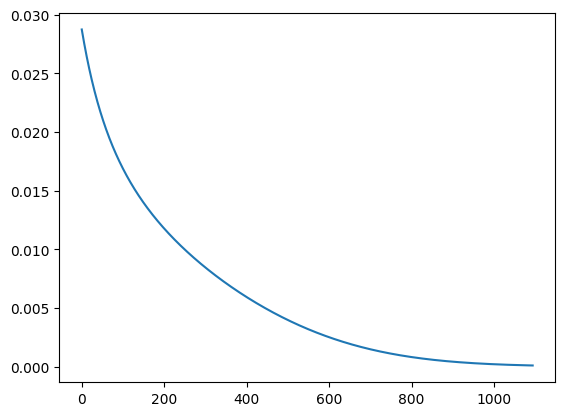

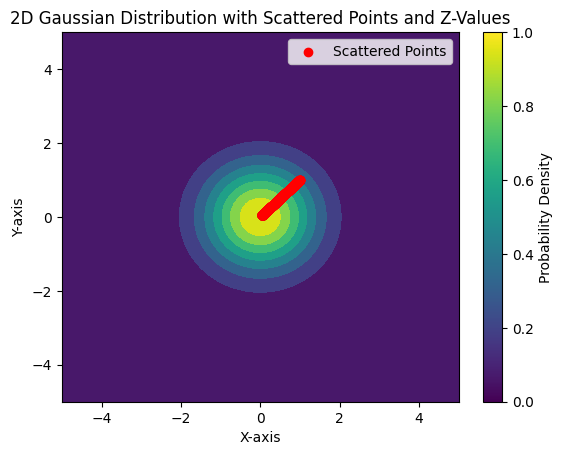

In [330]:
#Gradient Descent
num_points = 8

sigma_x_target = 1
sigma_y_target = 1
mu_x_target = 0
mu_y_target = 0

x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)

X, Y = np.meshgrid(x, y)
Z = gaussian_2D(X, Y, sigma_x_target, sigma_y_target, mu_x_target, mu_y_target)
# Z = Z/np.amax(Z)
# Z = Z + np.random.normal(0.0001,0.03, Z.shape)

#Guess parameters
sigma_x = 1
sigma_y = 1
mu_x = 1
mu_y = 1
lr = 0.1

def descend(x, y, Z, sigma_x, sigma_y, mu_x, mu_y, lr):
    dldsigma_x = 0.0
    dldsigma_y = 0.0
    dldmu_x = 0.0
    dldmu_y = 0.0

    X, Y = np.meshgrid(x, y)
    Zhat = gaussian_2D(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_sigma_x = get_gaussian_grad_sigma_x(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_sigma_y = get_gaussian_grad_sigma_y(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_mu_x = get_gaussian_grad_mu_x(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    gaus_grad_mu_y = get_gaussian_grad_mu_y(X, Y, sigma_x, sigma_y, mu_x, mu_y)

    #loss = (y-yhat)^2
    for i in range(len(x)):
        for j in range(len(y)):
            # print(x[i], y[j])
            dldsigma_x += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x[i][j]
            dldsigma_y += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y[i][j]
            dldmu_x += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x[i][j]
            dldmu_y += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y[i][j]

    sigma_x = sigma_x - lr*dldsigma_x
    sigma_y = sigma_y - lr*dldsigma_y
    mu_x = mu_x - lr*dldmu_x
    mu_y = mu_y - lr*dldmu_y

    return sigma_x, sigma_y, mu_x, mu_y

loss_array = np.array([])
mu_x_list = np.array([])
mu_y_list = np.array([])
loss = 1
epoch = 0
while loss > 0.0001:
    sigma_x, sigma_y, mu_x, mu_y = descend(x, y, Z, sigma_x, sigma_y, mu_x, mu_y, lr)
    mu_x_list = np.append(mu_x_list, mu_x)
    mu_y_list = np.append(mu_y_list, mu_y)
    Zhat = gaussian_2D(X, Y, sigma_x, sigma_y, mu_x, mu_y)
    loss = np.sum((Z-Zhat)**2)
    loss_array = np.append(loss_array, loss)
    print(f'{epoch}, loss is {loss} with sigma_x: {sigma_x} and sigma_y: {sigma_y} and mu_x: {mu_x} and mu_y: {mu_y}')
    epoch += 1

loss_x = np.linspace(0,len(loss_array)-1, len(loss_array))
plt.plot(loss_x, loss_array)
print("sigma_x:", sigma_x, "sigma_y:", sigma_y, "mu_x:", mu_x, "mu_y:", mu_y)

##show path of mu

# Define parameters

# Create grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate Gaussian values
Z = gaussian_2D(X, Y, sigma_x_target, sigma_y_target, mu_x_target, mu_y_target)

# Plot the 2D Gaussian distribution and scattered points with z-values
plt.figure()
plt.contourf(X, Y, Z, cmap='viridis')
plt.scatter(mu_x_list, mu_y_list, color='red', label='Scattered Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Gaussian Distribution with Scattered Points and Z-Values')
plt.colorbar(label='Probability Density')
plt.legend()
plt.show()




2D Gradient Descent Localization 2 Emitters

0, loss is 0.16087905107037156 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: -1.99138836657217 and mu_y1: 0.0008154107929055285 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: -1.994386664239281 and mu_y2: -1.9991223398998457
1, loss is 0.15980767807597096 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: -1.9827684324439743 and mu_y1: 0.0016106031807788536 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: -1.9887838520409407 and mu_y2: -1.9982252824735773
2, loss is 0.15873610576082525 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: -1.9741405623371042 and mu_y1: 0.0023857580831193443 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: -1.9831916686753928 and mu_y2: -1.9973089717699324
3, loss is 0.15766439081547126 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: -1.9655051250528992 and mu_y1: 0.0031410580333589722 and sigma_x2: 1.0 and sigma_y2: 1.0 and mu_x2: -1.9776102192775025 and mu_y2: -1.9963735514634027
4, loss is 0.15659259109137555 with sigma_x1: 1.0 and sigma_y1: 1.0 and mu_x1: -1.9

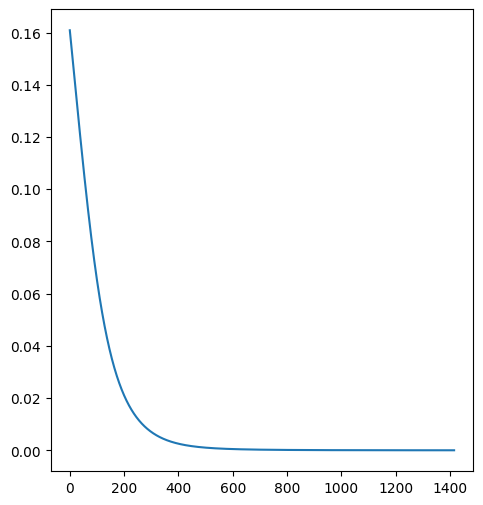

<Figure size 640x480 with 0 Axes>

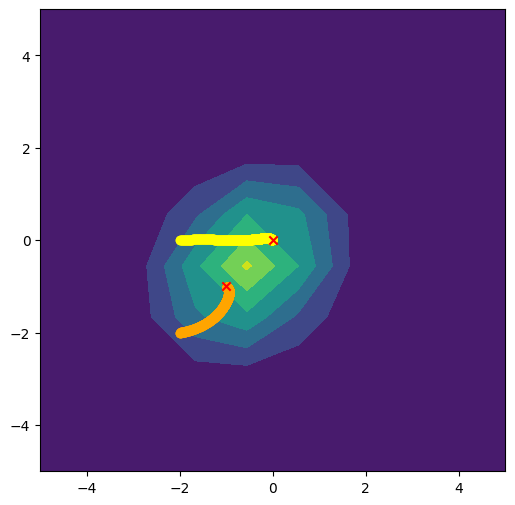

In [395]:
#Gradient Descent
num_points = 10

sigma_x_target1 = 1
sigma_y_target1 = 1
mu_x_target1 = 0
mu_y_target1 = 0

sigma_x_target2 = 1
sigma_y_target2 = 1
mu_x_target2 = -1
mu_y_target2 = -1

x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)

X, Y = np.meshgrid(x, y)
Z = gaussian_2D(X, Y, sigma_x_target1, sigma_y_target1, mu_x_target1, mu_y_target1)
Z += gaussian_2D(X, Y, sigma_x_target2, sigma_y_target2, mu_x_target2, mu_y_target2)

sigma_x1 = 1
sigma_y1 = 1
mu_x1 = -2
mu_y1 = 0

sigma_x2 = 1
sigma_y2 = 1
mu_x2 = -2
mu_y2 = -2

lr = 0.1


def descend(x, y, Z, sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2, lr):
    dldsigma_x1 = 0.0
    dldsigma_y1 = 0.0
    dldmu_x1 = 0.0
    dldmu_y1 = 0.0
    dldsigma_x2 = 0.0
    dldsigma_y2 = 0.0
    dldmu_x2 = 0.0
    dldmu_y2 = 0.0

    X, Y = np.meshgrid(x, y)
    Zhat = gaussian_2D(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)+gaussian_2D(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_sigma_x1 = get_gaussian_grad_sigma_x(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_sigma_y1 = get_gaussian_grad_sigma_y(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_mu_x1 = get_gaussian_grad_mu_x(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_mu_y1 = get_gaussian_grad_mu_y(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)
    gaus_grad_sigma_x2 = get_gaussian_grad_sigma_x(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_sigma_y2 = get_gaussian_grad_sigma_y(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_mu_x2 = get_gaussian_grad_mu_x(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    gaus_grad_mu_y2 = get_gaussian_grad_mu_y(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)

    #loss = (y-yhat)^2
    for i in range(len(x)):
        for j in range(len(y)):
            # # print(x[i], y[j])
            # dldsigma_x1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x1[i][j]
            # dldsigma_y1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y1[i][j]
            dldmu_x1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x1[i][j]
            dldmu_y1 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y1[i][j]
            # dldsigma_x2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_x2[i][j]
            # dldsigma_y2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_sigma_y2[i][j]
            dldmu_x2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_x2[i][j]
            dldmu_y2 += 2*(Z[i][j]-Zhat[i][j])*-1*gaus_grad_mu_y2[i][j]

    sigma_x1 = sigma_x1 - lr*(1/100)*dldsigma_x1
    sigma_y1 = sigma_y1 - lr*(1/100)*dldsigma_y1
    mu_x1 = mu_x1 - lr*dldmu_x1
    mu_y1 = mu_y1 - lr*dldmu_y1
    sigma_x2 = sigma_x2 - lr*(1/100)*dldsigma_x2
    sigma_y2 = sigma_y2 - lr*(1/100)*dldsigma_y2
    mu_x2 = mu_x2 - lr*dldmu_x2
    mu_y2 = mu_y2 - lr*dldmu_y2

    return sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2


loss_array = np.array([])
mu_x_list1 = np.array([])
mu_y_list1 = np.array([])
mu_x_list2 = np.array([])
mu_y_list2 = np.array([])
loss = 1
epoch = 0
while loss > 5e-6:
    sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2 = descend(x, y, Z, sigma_x1, sigma_y1, mu_x1, mu_y1, sigma_x2, sigma_y2, mu_x2, mu_y2, lr)
    mu_x_list1 = np.append(mu_x_list1, mu_x1)
    mu_y_list1 = np.append(mu_y_list1, mu_y1)
    mu_x_list2 = np.append(mu_x_list2, mu_x2)
    mu_y_list2 = np.append(mu_y_list2, mu_y2)
    Zhat = gaussian_2D(X, Y, sigma_x1, sigma_y1, mu_x1, mu_y1)+gaussian_2D(X, Y, sigma_x2, sigma_y2, mu_x2, mu_y2)
    loss = np.sum((Z-Zhat)**2)
    loss_array = np.append(loss_array, loss)
    print(f'{epoch}, loss is {loss} with sigma_x1: {sigma_x1} and sigma_y1: {sigma_y1} and mu_x1: {mu_x1} and mu_y1: {mu_y1} and sigma_x2: {sigma_x2} and sigma_y2: {sigma_y2} and mu_x2: {mu_x2} and mu_y2: {mu_y2}')
    epoch += 1
    

loss_x = np.linspace(0,len(loss_array)-1, len(loss_array))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(loss_x, loss_array)



plt.figure()
plt.figure(figsize=(6,6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.scatter(mu_x_list1, mu_y_list1, color='yellow', label='Scattered Points')
plt.scatter(mu_x_list2, mu_y_list2, color='orange', label='Scattered Points')
plt.scatter(mu_x_target1, mu_y_target1, marker="x", color="red")
plt.scatter(mu_x_target2, mu_y_target2, marker="x", color="red")